# Debopam Das

## Task - Stock Market and Sentement Analysis

### Collecting necessary libraries

In [1]:
import pandas_datareader as dr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import numpy as np
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

### collecting the data

In [2]:
df=dr.data.get_data_yahoo('TATASTEEL.NS',start='2016-05-15',end='2021-05-15')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-05-16,311.783051,304.304077,307.781586,310.973236,4125806.0,278.857941
2016-05-17,315.498749,309.067780,313.259796,311.687805,5121836.0,279.498688
2016-05-18,314.593628,307.876831,310.306335,313.497986,3946031.0,281.121948
2016-05-19,321.453339,309.639404,311.068512,310.830322,6833711.0,278.729736
2016-05-20,311.640167,305.923737,310.782684,307.400482,4839839.0,275.654175
...,...,...,...,...,...,...
2021-05-07,1192.000000,1130.099976,1135.000000,1182.349976,54075433.0,1182.349976
2021-05-10,1229.000000,1200.000000,1210.000000,1216.349976,28080884.0,1216.349976
2021-05-11,1246.000000,1176.900024,1190.000000,1233.900024,41108381.0,1233.900024


### plotting the data

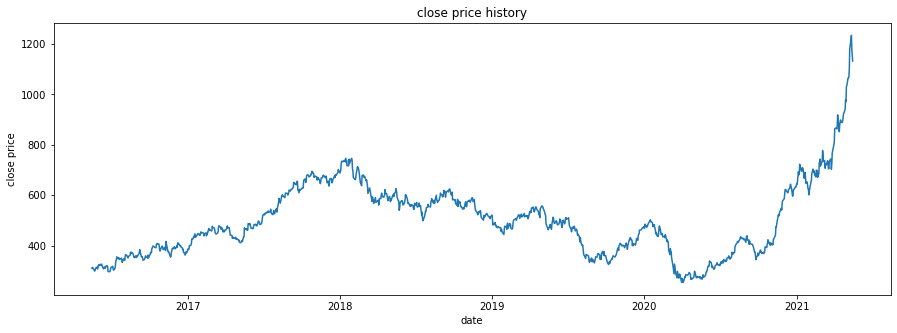

In [3]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('close price history')
plt.xlabel('date')
plt.ylabel('close price')
plt.show()

### preprocessing the data

In [4]:
data=df.filter(['Close'])
x=len(data)
df_1=data.values

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
model=scaler.fit(data)
scaled=model.transform(data)
scaled

array([[0.05838212],
       [0.05911116],
       [0.060958  ],
       ...,
       [1.        ],
       [0.9441412 ],
       [0.8961383 ]])

In [6]:
train_size=math.ceil(x*0.7)
train_size

863

In [7]:
train_data=scaled[0:train_size]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

    if i<=61:
        print('xtrain',x_train)
        print('ytrain',y_train)

xtrain [array([0.05838212, 0.05911116, 0.060958  , 0.05823631, 0.05473701,
       0.04589151, 0.04992544, 0.05663245, 0.05721569, 0.06149263,
       0.05444539, 0.06610976, 0.06397131, 0.07223358, 0.0701923 ,
       0.06951189, 0.07412902, 0.07305979, 0.07359442, 0.06615837,
       0.0551744 , 0.05697267, 0.06212443, 0.06236745, 0.0574587 ,
       0.06795663, 0.06581818, 0.06426292, 0.06572097, 0.04501669,
       0.04292683, 0.04389886, 0.04594011, 0.05405657, 0.06003458,
       0.06309649, 0.06542936, 0.04992544, 0.05055727, 0.05896535,
       0.07383744, 0.0888553 , 0.09036195, 0.10358157, 0.09653437,
       0.10100569, 0.09925606, 0.09327805, 0.09633996, 0.09459029,
       0.09862422, 0.09400709, 0.08117626, 0.08623081, 0.09575673,
       0.09284063, 0.08914691, 0.10445642, 0.11213546, 0.11004561])]
ytrain [0.1059630751480592]
xtrain [array([0.05838212, 0.05911116, 0.060958  , 0.05823631, 0.05473701,
       0.04589151, 0.04992544, 0.05663245, 0.05721569, 0.06149263,
       0.0544453

In [8]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(803, 60, 1)

### Model building

In [9]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [11]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 803 samples
803/803 [==============================] - 55s 68ms/sample - loss: 8.4306e-04


### prediction

In [12]:
test_data=scaled[train_size-60:,:]
x_test=[]
y_test=df_1[train_size:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [13]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [14]:
prediction=model.predict(x_test)
prediction=scaler.inverse_transform(prediction)

C:\Users\DEBOPAM DAS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


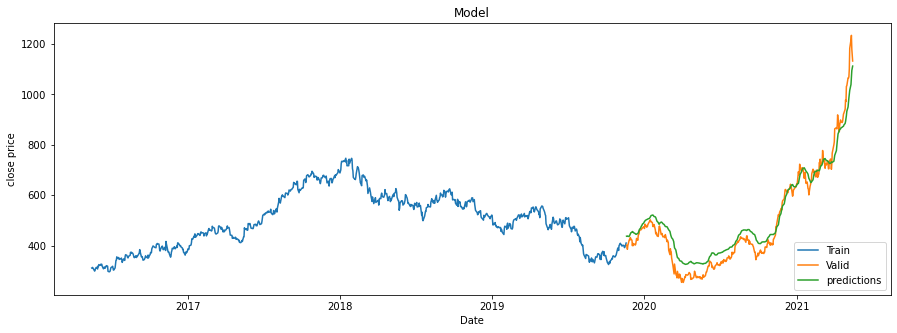

In [15]:
train=data[:train_size]
valid=data[train_size:]
valid['predictions']=prediction
plt.figure(figsize=(15,5))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('close price')
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Valid','predictions'],loc='lower right')
plt.show()

## Sentimentel Analysis

In [16]:
data=pd.read_csv(r"C:\Users\DEBOPAM DAS\OneDrive\Desktop\New folder\GRIP_may_21\india-news-headlines.csv")

In [17]:
data

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...


In [18]:
dt=data[['headline_text']].copy()
dt=dt.iloc[:1500]

In [19]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to C:\Users\DEBOPAM
[nltk_data]     DAS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\DEBOPAM
[nltk_data]     DAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
sid=SentimentIntensityAnalyzer()
result=[]
for line in dt['headline_text']:
    scores=sid.polarity_scores(line)
    scores['headline']=line
    result.append(scores)
rev=pd.DataFrame(result)
rev

,neg,neu,pos,compound,headline
0,0.000,0.805,0.195,0.2924,Status quo will not be disturbed at Ayodhya; s...
1,0.000,1.000,0.000,0.0000,Fissures in Hurriyat over Pak visit
2,0.322,0.678,0.000,-0.2263,America's unwanted heading for India?
3,0.000,1.000,0.000,0.0000,For bigwigs; it is destination Goa
4,0.000,0.658,0.342,0.3818,Extra buses to clear tourist traffic
...,...,...,...,...,...
1495,0.000,0.632,0.368,0.5423,Surya Kiran team shines in blazing glory
1496,0.000,1.000,0.000,0.0000,Tipnis takes a ride on Sukhoi
1497,0.000,0.737,0.263,0.3612,RAF ready to train Indian pilots on Hawk
1498,0.000,1.000,0.000,0.0000,This Air Marshal from England has an Indian link


In [21]:
ratings=[]
for row in rev['compound']:
  if row >= 0.05 :
      ratings.append(1)
  elif row <= - 0.05 :
    ratings.append(-1)
  else :
    ratings.append(0)

rev['scores']=ratings
rev

,neg,neu,pos,compound,headline,scores
0,0.000,0.805,0.195,0.2924,Status quo will not be disturbed at Ayodhya; s...,1
1,0.000,1.000,0.000,0.0000,Fissures in Hurriyat over Pak visit,0
2,0.322,0.678,0.000,-0.2263,America's unwanted heading for India?,-1
3,0.000,1.000,0.000,0.0000,For bigwigs; it is destination Goa,0
4,0.000,0.658,0.342,0.3818,Extra buses to clear tourist traffic,1
...,...,...,...,...,...,...
1495,0.000,0.632,0.368,0.5423,Surya Kiran team shines in blazing glory,1
1496,0.000,1.000,0.000,0.0000,Tipnis takes a ride on Sukhoi,0
1497,0.000,0.737,0.263,0.3612,RAF ready to train Indian pilots on Hawk,1
1498,0.000,1.000,0.000,0.0000,This Air Marshal from England has an Indian link,0


In [22]:
rev['scores'].value_counts()

 0    822
 1    358
-1    320
Name: scores, dtype: int64

[Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')]

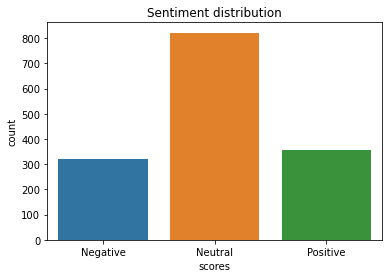

In [23]:
f = sns.countplot(x='scores', data=rev)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Neutral','Positive'])